# Creating Datasets

In [13]:
import cv2


face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_extractor(img):
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    # Crop all faces found
    for (x,y,w,h) in faces:
        x=x-10
        y=y-10
        cropped_face = img[y:y+h+50, x:x+w+50]

    return cropped_face

cap = cv2.VideoCapture(1)
count = 0
while True:
    ret, frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame), (400, 400))
        # Saving the file
        file_name_path = 'data/' + str(count) + '.jpg'
        cv2.imwrite(file_name_path, face)
        #count on image display
        cv2.putText(face, str(count), (64, 64), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Cropped Faces', face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1) == 13 or count == 5: #13 is Enter
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_16988/3835752840.py:9: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


# Training and Evaluating the model

Found 1195 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
{'Ishan': 0, 'Megh': 1, 'Miit': 2, 'Om': 3, 'Shashank': 4}
Epoch 1/5
38/38 [==============================] - 31s 784ms/step - loss: 0.6421 - accuracy: 0.7640 - val_loss: 1.0137 - val_accuracy: 0.8333
Epoch 2/5
38/38 [==============================] - 18s 481ms/step - loss: 0.0687 - accuracy: 0.9782 - val_loss: 2.0591 - val_accuracy: 0.8300
Epoch 3/5
38/38 [==============================] - 19s 489ms/step - loss: 0.0597 - accuracy: 0.9908 - val_loss: 1.7339 - val_accuracy: 0.8300
Epoch 4/5
38/38 [==============================] - 22s 580ms/step - loss: 0.1183 - accuracy: 0.9640 - val_loss: 2.2507 - val_accuracy: 0.8300
Epoch 5/5
38/38 [==============================] - 31s 800ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 2.3554 - val_accuracy: 0.8300


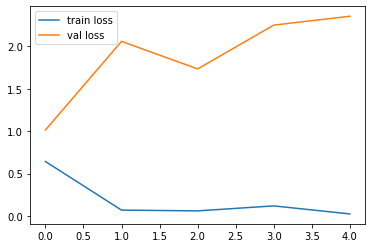

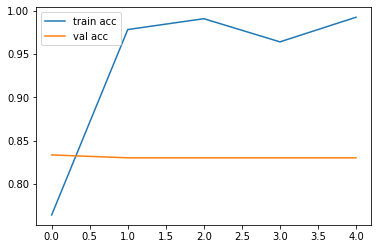

In [3]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout,Activation
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import os
# import 


IMAGE_SIZE = [64, 64]

train_path = os.path.join('./dataset/Train')
test_path = os.path.join('./dataset/Test')

INPUT_SIZE = IMAGE_SIZE + [3]

# model = Sequential([
#     Input(shape=INPUT_SIZE),
#     Conv2D(8, 7, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     MaxPooling2D(),
#     Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     Dropout(rate=0.3),
#     Conv2D(8, 7, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
#     Flatten(),
#     Dense(5, activation='softmax')
# ])

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=INPUT_SIZE ))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'] )

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=10,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='categorical')
print(training_set.class_indices)


# fitting the model
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5)

# Plotting Loss and Accuracy

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss.jpg')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
# plt.savefig('AccVal_acc.jpg')

model.save('facefeatures_model.h5')


# Real Time Face Recognition

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
model = load_model('./facefeatures_model_best.h5')

faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
FONT_THICKNESS=2
cap = cv2.VideoCapture(1) 
cap.set(3,640) 
cap.set(4,480)

while True:
    ret, image = cap.read()
    faces = faceCascade.detectMultiScale(image)
    for (x, y, w, h) in faces:
        crop = image[y:y+h, x:x+w]
        resized = cv2.resize(crop, (64, 64), interpolation=cv2.INTER_AREA)
        resized=cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        resized=resized/255
        # print(resized.shape)
        a=model.predict(resized[np.newaxis, ...])
        pred = np.argmax(a)
        print(a)
        peoples=['Ishan', 'Megh', 'Miit', 'Om', 'Shashank']
        #peoples=[0,1,2,3,4]
        print(pred)
        cv2.rectangle(image, (x, y), (x+w, y+h),  (0, 255, 0),3)
        cv2.putText(image, peoples[pred], (x, y), cv2.FONT_HERSHEY_COMPLEX, 2,  (0, 255, 0), 2, cv2.LINE_AA)
        
    cv2.imshow('video', image)
    k = cv2.waitKey(30)
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()

[[0.16513455 0.00858031 0.7447727  0.07290281 0.00860964]]
2
[[5.9975773e-01 1.0364454e-06 3.6009356e-01 4.0147729e-02 4.6729665e-09]]
0
[[0.0368129  0.01898677 0.65728724 0.19482778 0.09208524]]
2
[[9.3798274e-03 3.4735842e-06 9.8300511e-01 7.6115057e-03 7.5247542e-08]]
2
[[1.1196026e-02 1.4279362e-06 9.8500317e-01 3.7993565e-03 2.7130952e-08]]
2
[[0.04610287 0.03385688 0.5894772  0.20144103 0.12912208]]
2
[[0.06693744 0.00411557 0.8160825  0.11081346 0.00205106]]
2
[[0.19106364 0.00528296 0.7468783  0.05156432 0.00521078]]
2
[[1.1413710e-05 9.9988556e-01 3.1872518e-05 3.6290548e-05 3.4947443e-05]]
1
[[4.8175207e-01 1.0596948e-05 4.7137812e-01 4.6859227e-02 4.8107179e-08]]
0
[[2.6460066e-02 1.8119490e-05 9.5952982e-01 1.3991719e-02 2.4061652e-07]]
2
[[0.1639023  0.00709499 0.7422226  0.07538284 0.01139723]]
2
[[0.28725794 0.01233205 0.6345374  0.05621602 0.00965656]]
2
[[0.21374226 0.01397977 0.69968665 0.05994272 0.01264862]]
2
[[0.56811816 0.03672598 0.33202118 0.02996276 0.03317185

# Localization, Recognition and Classification

[[ 17  22 311 311]]
[[0.0181473  0.03295818 0.92287207 0.01725264 0.0087698 ]]
2


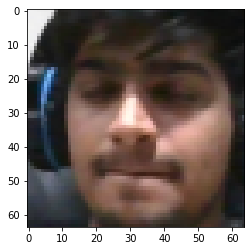

[[ 35  27 302 302]]
[[9.8109908e-02 1.5912763e-03 1.1657686e-02 8.8823956e-01 4.0159817e-04]]
3


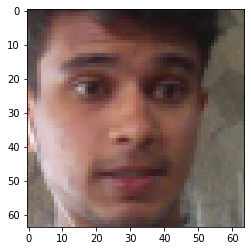

[[ 31  27 287 287]]
[[6.5481760e-02 5.2726449e-07 3.3698583e-07 9.2946365e-08 9.3451726e-01]]
4


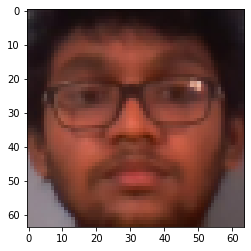

[[ 17  22 311 311]]
[[0.02249891 0.02484218 0.92815405 0.01745413 0.00705071]]
2


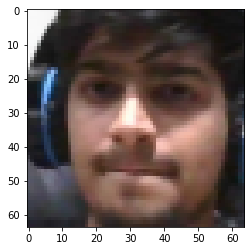

[[ 21  24 302 302]]
[[0.00797466 0.004976   0.9670021  0.01694789 0.00309932]]
2


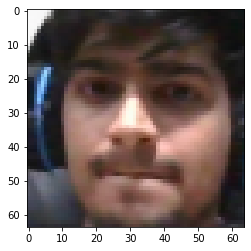

[[ 25  18 309 309]]
[[0.00297895 0.00157387 0.9634083  0.02983664 0.00220227]]
2


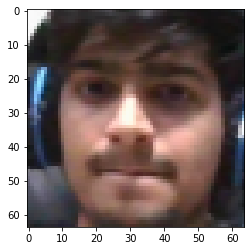

[[ 28  27 301 301]]
[[2.5953243e-03 7.0156733e-04 9.6721750e-01 2.8274912e-02 1.2106776e-03]]
2


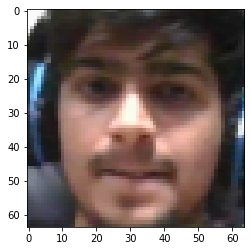

[[373 481 509 509]]
[[0.32622054 0.32955652 0.3241137  0.01586311 0.00424619]]
1


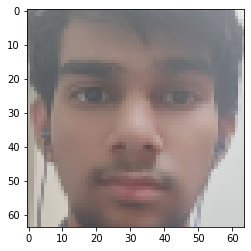

In [15]:
import numpy as np
import os
from PIL import Image
import cv2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

images_all=os.listdir("data")
model = load_model('./facefeatures_model.h5')

peoples=['Ishan', 'Megh', 'Miit', 'Om', 'Shashank']
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

for i in images_all:
    img = cv2.imread("data/"+i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    
    detection = faceCascade.detectMultiScale(img) 
#     print(detection)
    count = 0
    for face in detection:
        print(detection)
        x, y, w, h = face
        crop = img[y:y+h, x:x+w]
#         plt.imshow(crop)
        resized = cv2.resize(crop, (64, 64), interpolation=cv2.INTER_AREA)
        plt.imshow(resized)
        resized= resized/255.0
        a  = model.predict(resized[np.newaxis,...])
        print(a)
        pred = np.argmax(a)
        print(pred)
        name = peoples[pred]
        cv2.imwrite("All_new_images/" + name + "/" + i, img)
    
        plt.show()
    